In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)}) 

ess2014 = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_sub1.csv')

## ØVELSE 1: Indlæs datasæt

1. Indlæs datasættet ESS2014DK_sub1 med `pd.read_csv()`. Funktionen kan indlæse data direkte fra et link (husk at importere pandas biblioteket).

    - Link til data: https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_sub1.csv
    
2. Brug `np.mean()` (`numpy.mean()`) til at udregne middelværdien af `height` variablen i datasættet. Hvad er middelværdien?


In [6]:
import pandas as pd
import numpy as np

ess2014 = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_sub1.csv')

print(np.mean(ess2014['height']))

174.15887850467288


## ØVELSE 2: Deskriptive mål

Brug `.describe()` eller passende numpy kommandoer til at finde ud af følgende:

- Hvor gammel er den yngste person i datasættet?
- Hvor gammel er den ældste person i datasættet?
- Hvad er gennemsnitsalderen i datasættet?

Husk at datasættet er fra 2014.

In [7]:
min_age = 2014 - ess2014['yrbrn'].max()
max_age = 2014 - ess2014['yrbrn'].min()
mean_age = 2014 - ess2014['yrbrn'].mean()

print(min_age, max_age, mean_age)

15 100 47.67509986684422


*TIP*: Brug "f-strings" til at indsætte python-objekter direkte i et stykke tekst:

In [8]:
print(f"Den yngste person i datasættet er {min_age} år gammel, den ældste person i datasættet er {max_age} år gammel og gennemsnitsalderen er {mean_age} år.")

Den yngste person i datasættet er 15 år gammel, den ældste person i datasættet er 100 år gammel og gennemsnitsalderen er 47.67509986684422 år.


*TIP*: Brug `np.round()` (fra `numpy`) til at afrunde værdier:

In [9]:
mean_age_rounded = np.round(mean_age, decimals = 0)

print(f"Gennemsnitsalderen i datasættet er {mean_age_rounded} år.")

Gennemsnitsalderen i datasættet er 48.0 år.


## ØVELSE 3: Plotting

Dan et histogram over varialben `yrbrn` i ESS2014DK datasættet.

<AxesSubplot:>

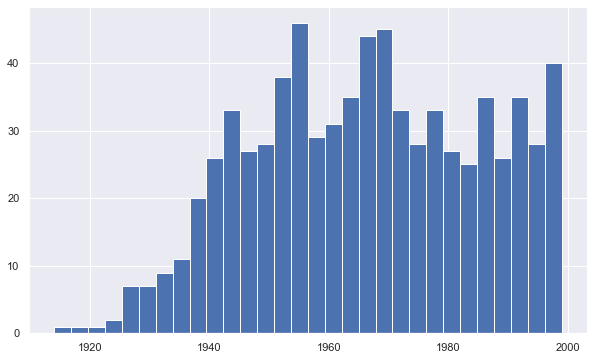

In [10]:
ess2014['yrbrn'].hist(bins = 30)

## ØVELSE 4: Selekter observationer

*Dan et subet bestående af mænd født efter 1980.*

In [11]:
ess2014_subset = ess2014.loc[(ess2014['gndr'] == 'Male') & (ess2014['yrbrn'] > 1980), :]

ess2014_subset.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
10,943317,9,9,Very good,NaN,Once a month,178.0,72.0,Male,1989
33,923426,8,8,Good,20.0,Once a week,184.0,84.0,Male,1991
35,931443,5,Extremely happy,Good,NaN,Several times a week,185.0,66.0,Male,1990
36,935934,7,5,Fair,2.0,Several times a week,188.0,74.0,Male,1994
43,935251,6,7,Good,NaN,Once a week,190.0,93.0,Male,1991



## ØVELSE 5: Dan en aldersvariabel

*Tilføj en aldersvariabel til ESS2014DK datasættet (husk at data er fra 2014)*


In [49]:
ess2014['age'] = 2014 - ess2014['yrbrn']

ess2014.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn,height_m,age
0,921490,4,Extremely happy,Very good,NaN,Never,167.0,62.0,Female,1965,1.67,49
1,938348,Most people can be trusted,7,Good,NaN,Several times a week,168.0,70.0,Female,1973,1.68,41
2,939019,5,8,Good,3.0,Once a week,182.0,90.0,Male,1980,1.82,34
3,924985,8,9,Very good,NaN,Once a week,188.0,85.0,Male,1946,1.88,68
4,925410,4,8,Bad,NaN,Several times a week,156.0,60.0,Female,1969,1.56,45


## ØVELSE 6: Rekodning

`cgtsday` angiver, hvor mange cigaretter om dagen personen ryger. Ud fra denne kan dannes en "ryger"-variabel.

*Dan en variabel, der angiver, hvorvidt personen ryger eller ej*

TIP: Brug `isnull()` og `notnull()` til at selektere missingværdier eller ikke-missingværdier

In [12]:
ess2014['smoker'] = np.nan

ess2014.loc[(ess2014['cgtsday'].isnull()) | (ess2014['cgtsday'] == 0), 'smoker'] = 'not a smoker'
ess2014.loc[ess2014['cgtsday'].notnull() | (ess2014['cgtsday'] > 0), 'smoker'] = 'smoker'

ess2014.head(10)

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn,smoker
0,921490,4,Extremely happy,Very good,NaN,Never,167.0,62.0,Female,1965,not a smoker
1,938348,Most people can be trusted,7,Good,NaN,Several times a week,168.0,70.0,Female,1973,not a smoker
2,939019,5,8,Good,3.0,Once a week,182.0,90.0,Male,1980,smoker
3,924985,8,9,Very good,NaN,Once a week,188.0,85.0,Male,1946,not a smoker
4,925410,4,8,Bad,NaN,Several times a week,156.0,60.0,Female,1969,not a smoker
5,928947,5,Extremely happy,Good,20.0,Every day,167.0,75.0,Male,1950,smoker
6,947921,7,8,Good,NaN,Less than once a month,169.0,63.0,Female,1980,not a smoker
7,926953,Most people can be trusted,8,Good,NaN,Once a month,184.0,73.0,Male,1940,not a smoker
8,943553,8,8,Good,NaN,Once a week,182.0,86.0,Male,1971,not a smoker
9,936299,8,9,Very good,8.0,Several times a week,172.0,73.0,Female,1965,smoker


## ØVELSE 7: Ændr variabeltypen

1. Check hvilken type variabel `happy` er med `.dtypes`.

2. Variablen kan laves til numerisk. Lav en kopi af variablen (evt. kald den `happy_num`).

3. Rekod tekstværdierne til tal med `.replace()` - Husk at rekodninger skal specificeres som en dictionary ( `{"gammel værdi": "ny værdi", "gammel værdi": "ny værdi"}` ).
    - "Extremely happy" skal kodes til "10"
    - "Extremely unhappy" skal kodes til "0"
    
4. Konverter variablen til numerisk med `.astype('float')`.

5. Udregn gennemsnit for variablen med `.mean()`.

In [13]:
print(ess2014['happy'].dtypes)

ess2014['happy_num'] = ess2014['happy']
ess2014['happy_num'] = ess2014['happy_num'].replace({"Extremely happy": "10", "Extremely unhappy": "0"})
ess2014['happy_num'] = ess2014['happy_num'].astype('float')

print(ess2014['happy_num'].dtypes)

ess2014['happy_num'].mean()

object
float64


8.278666666666666

## ØVELSE 8: Konverter til kategorisk

1. Tag et kig på variablen `alcfreq`. Er variablen nominal eller ordinal?

2. Rekod `alcfreq` til at være kategorisk. Hvis den er ordinal, så dan et kategoriobjekt, som kan bruges til at kode variablen (tjek værdier i variablen med `.unique()`

In [15]:
from pandas.api.types import CategoricalDtype

ess2014['alcfreq'].unique() # Tjek værdier for at se, hvordan variablen er kodet (ordinalt)

alc_cat = CategoricalDtype(categories = ['Never', 'Less than once a month', 'Once a month',   # Danner kategoriobjekt
                                         '2-3 times a month', 'Once a week', 'Several times a week', 
                                         'Every day'], ordered = True)

ess2014['alcfreq'] = ess2014['alcfreq'].astype(alc_cat) # Ændrer typen

ess2014['alcfreq'].unique() # Bekræfter ændringen

['Never', 'Several times a week', 'Once a week', 'Every day', 'Less than once a month', 'Once a month', '2-3 times a month', NaN]
Categories (7, object): ['Never' < 'Less than once a month' < 'Once a month' < '2-3 times a month' < 'Once a week' < 'Several times a week' < 'Every day']

## ØVELSE 9: Rekod kategorisk

1. Dan en varibel, der består af variablen `health` rekodet til at indeholde kategorierne "Good", "Fair" og "Bad".
    - "Very good" rekodes til "Good"
    - "Very bad" rekodes til "Bad"

2. (valgfri) Rekod variablen til at være ordinal

3. Dan et cirkelplot af den rekodede variabel med `.plot.pie()` (husk at brug `value_counts()`)

<AxesSubplot:ylabel='health_3cats'>

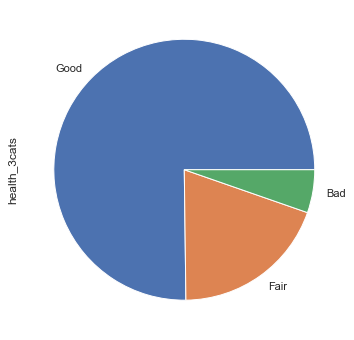

In [16]:
health_recodedict = {'Very good': 'Good', 'Very bad': 'Bad'}

health_cat3 = CategoricalDtype(categories = ['Bad', 'Fair', 'Good'], ordered = True)

ess2014['health_3cats'] = ess2014['health'].replace(health_recodedict)
ess2014['health_3cats'] = ess2014['health_3cats'].astype(health_cat3)

ess2014['health_3cats'].value_counts().plot.pie()